In [120]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import cv2

%matplotlib inline

In [121]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(14,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

In [122]:
reeses = cv2.imread(".\image\puffs.png",0)

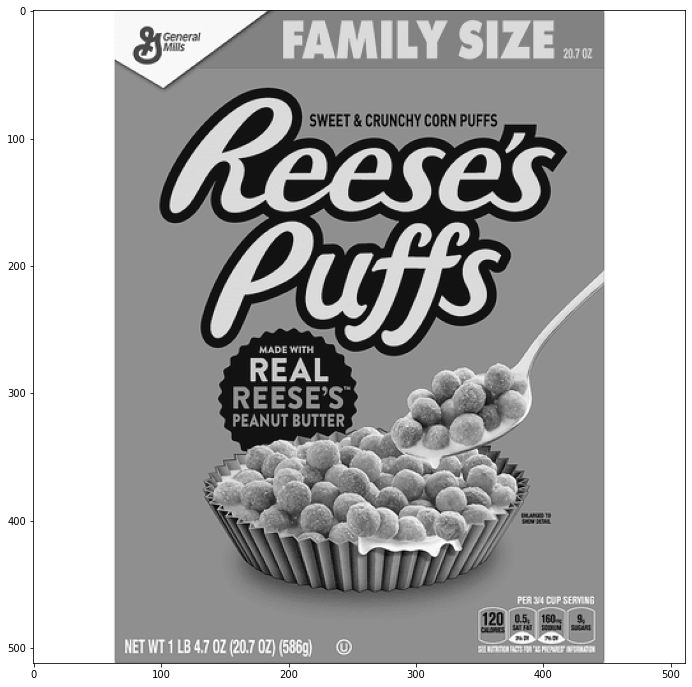

In [123]:
display(reeses)

In [124]:
cereals = cv2.imread(".\image\cereal.jpg",0)

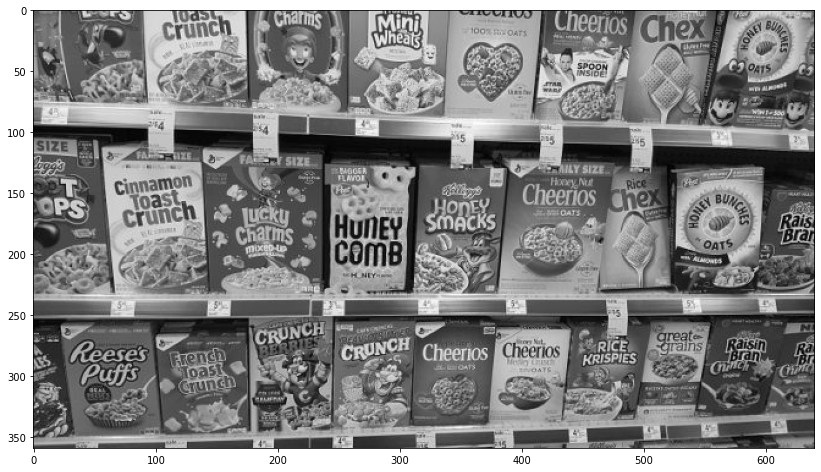

In [125]:
display(cereals)

In [126]:
orb = cv2.ORB_create() #detector

In [127]:
key_point1, desply1 = orb.detectAndCompute(reeses,None)
key_point2, desply2 = orb.detectAndCompute(cereals,None)

In [128]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [129]:
matches = bf.match(desply1,desply2)

In [130]:
single_match = matches[0]

In [131]:
single_match.distance

72.0

In [132]:
len(matches)

126

In [133]:
matches = sorted(matches, key=lambda x:x.distance)

In [134]:
reeses_matches = cv2.drawMatches(reeses, key_point1,cereals,key_point2, matches[:25], None, flags=2)

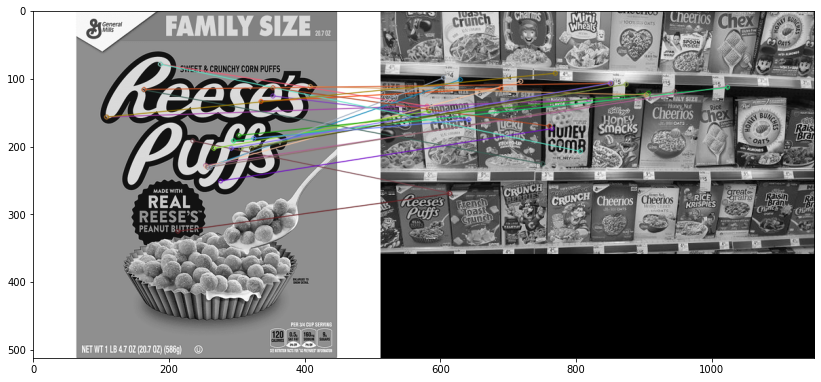

In [135]:
display(reeses_matches)

In [136]:
sift = cv2.SIFT_create()

In [137]:
key_point1, desply1 = sift.detectAndCompute(reeses,None)
key_point2, desply2 = sift.detectAndCompute(cereals,None)

In [138]:
bf = cv2.BFMatcher()

In [139]:
matches = bf.knnMatch(desply1, desply2, k=2)

In [140]:
good = []

# Less distance == better match
# Ratio match1 < 75% match 2
for match1, match2 in matches:
    # if match1 distance is less than 75% of match2 distance
    # then discriptor was a good match., lets keep it!
    if match1.distance < 0.75* match2.distance:
        good.append([match1])

In [141]:
len(good)

60

In [142]:
len(matches)

1043

In [143]:
sift_matches = cv2.drawMatchesKnn(reeses,key_point1,cereals,key_point2,good,None,flags=2)

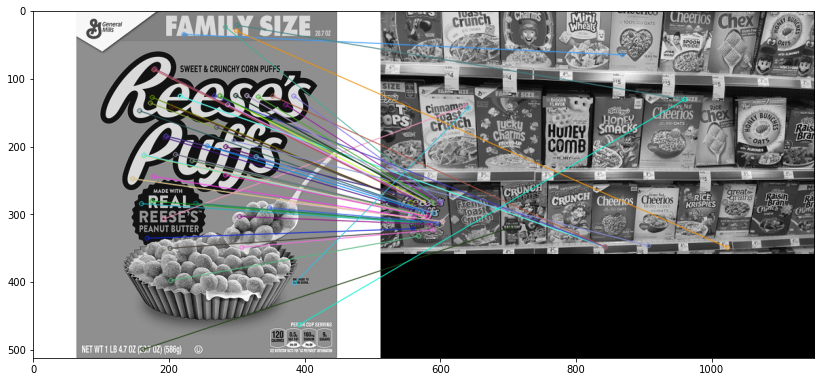

In [144]:
display(sift_matches)

In [145]:
sift = cv2.SIFT_create()

In [146]:
key_point1, desply1 = sift.detectAndCompute(reeses,None)
key_point2, desply2 = sift.detectAndCompute(cereals, None)

In [147]:
#Flann
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50) 

In [148]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [149]:
matches = flann.knnMatch(desply1,desply2,k=2)

In [150]:
matchesMask = [[0,0] for i in range(len(matches))]

In [151]:


for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
       matchesMask[i] = [1,0]

In [152]:
draw_params = dict(matchColor=(0,0,255),
                    singlePointColor=(255,0,0),
                    matchesMask = matchesMask,
                    flags = 2)

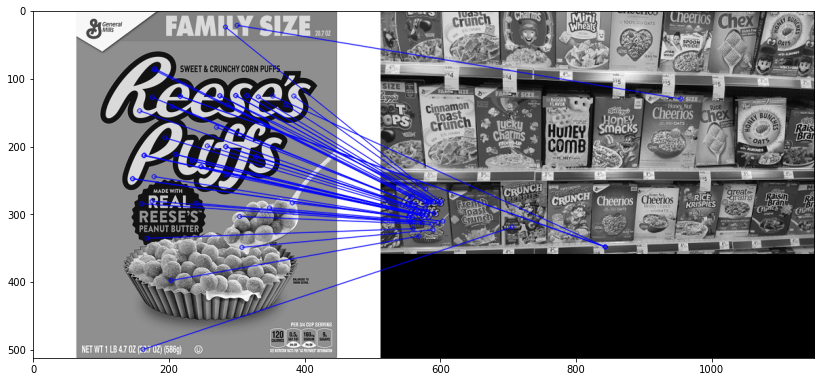

In [153]:
flann_matches = cv2.drawMatchesKnn(reeses,key_point1,cereals,key_point2, matches, None,**draw_params)
display(flann_matches)